# PROYECTO 2 #
# Ingeniería de features, Modelos avanzados e Interpretación de modelos
## PROYECTO: Análisis de mercado inmobiliario ##

1. [Análisis Exploratorio de Datos (EDA)](#1.-Análisis-Exploratorio-de-Datos)
2. [Preprocesamiento de Datos](#2.-Preprocesamiento-de-Datos)
3. [Modelos de Machine Learning](#3.-Modelos-de-Machine-Learning)
4. [Clustering](#4.-Clustering)
5. [Conclusión](#5.-Conclusión)

## 1. Análisis Exploratorio de Datos (EDA)

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
properati.shape # Filas y columnas

(146660, 19)

* *El Dataset, cuenta con **146.660 Filas**, y **19 Columnas**.*

In [4]:
properati.head(3) # Primeras 3 instancias (filas)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


3. __Valores Faltantes:__ se imprimen en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. En un principio es a mera exposición, ya que por el momento no vamos a descartar ninguno de ellos,ni realizar imputación de datos.

In [5]:
properati.isnull().sum() # Nombres de las columnas y su cantidad de faltantes

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

* *Variables con elementos faltantes:*  
    *1. `Superficie Cubierta` **15%** (21.614);*  
    *2. `Superficie Total` **14%** (20.527);*  
    *3. Latitud y Longitud 7% c/u (10.000 c/u);*  
    *4. Baños 4% (6.000).*

4. __Tipos de propiedad:__ Se explora cuántos tipos de propiedad hay publicados en el dataset y la cantidad de instancias por cada tipo de propiedad.

In [6]:
pd.unique(properati['property_type'])

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
print(properati['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


* *En el dataset de Properati se encuentran publicados __10 Tipos de Propiedad__ en la zona geográfica analizada.*  
* *Se destacan:*  
    *1. `Departamento` con 107.326 unidades __(73%)__;*  
    *2. `Casa` con 21.521 (15%);*  
    *3. `PH` con 14.298 instancias (10%).*

Text(0.5, 1.0, 'Número de Publicaciones por Tipo de Propiedad')

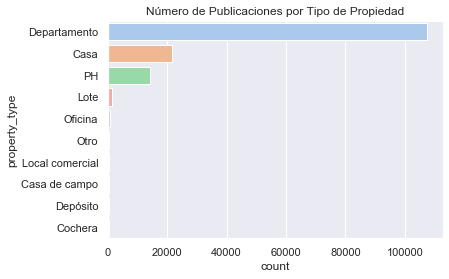

In [8]:
sns.countplot(data = properati, y = 'property_type', order = properati['property_type'].value_counts().index, palette='pastel')
plt.title('Número de Publicaciones por Tipo de Propiedad')

5. __Se visualizan las regiones__ a las cuales pertenecen las publicaciones.

Text(0.5, 1.0, 'Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

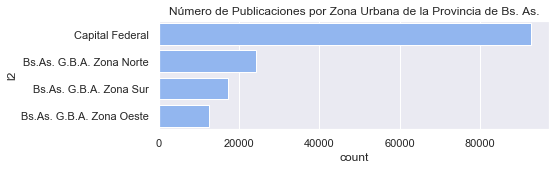

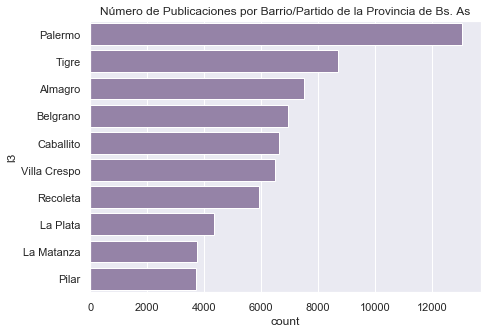

In [9]:
f, ax = plt.subplots(figsize = (7,2))
sns.countplot(y = 'l2', data = properati, order = properati['l2'].value_counts().index, color = '#82B3FF')
plt.title('Número de Publicaciones por Zona Urbana de la Provincia de Bs. As.')

f, ax = plt.subplots(figsize = (7,5))
sns.countplot(y = 'l3', data = properati, order = properati['l3'].value_counts().iloc[:10].index, color = '#957dad')
plt.title('Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

In [10]:
print(properati['l2'].value_counts())

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


In [11]:
print(properati['l3'].value_counts())

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


* *Las publicaciones son principalmente de `Capital Federal` **(63%)**.*  
* *Dentro de CABA, se detaca el barrio de `Palermo` (**14%** s/ CABA), seguido por Almagro, Belgrano, Caballito, Villa Crespo y Recoleta.*  
* *Dentro de AMBA, el partido de `Tigre` es el que presenta mayor número de publicaciones.*

6. __Se exponen las Estadísticas Descriptivas__, como ser la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los NaN valores.

In [12]:
pd.set_option('precision', 2) # Para una mejor visualización, se redujeron los decimales a 2

In [13]:
properati[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.0,146660.0,140703.0,126133.0,125046.0,1.47e+05
mean,3.0,2.0,2.0,217.0,113.0,2.41e+05
std,1.0,1.0,1.0,2038.0,917.0,3.19e+05
min,1.0,0.0,1.0,10.0,1.0,5.50e+03
25%,2.0,1.0,1.0,52.0,47.0,1.11e+05
50%,3.0,2.0,1.0,78.0,68.0,1.66e+05
75%,4.0,3.0,2.0,140.0,108.0,2.65e+05
max,35.0,15.0,14.0,193549.0,126062.0,3.24e+07


* *`Surface Total` y `Surface Covered`: los valores mínimos y máximos obtenidos resultan poco razonables para dichas instancias, ya que como se observa, oscilan entre 10m2 - 193.549m2 y 1m2 - 126.062m2 respectivamente. Al respecto, se observa una `Desviación Estándar Alta`, lo cual indica que los datos se extienden sobre un amplio rango de valores.*
* *`Bedrooms = 0`, es coherente, ya que podría tratarse de `Monoambientes`, donde se comparten en un mismo ambiente, living, cocina y dormitorio.*
* *`Bathrooms = 0`, es lógica por estar trabajando con Depósitos y Lotes por ejemplo, que pueden no tener baños.*
* *`Price`: Los mínimos y máximos distan mucho de la media.*

## 2. Preprocesamiento de Datos

### 2.1 Detección y Eliminación de Outliers

1. __Detección de Outliers__ a través de Boxplots, de las variables `Precio`, `Superficie Total` y `Superficie Cubierta` por considerarlas más relevantes y con mayor dispersión de datos s/ las estadísticas descriptivas previamente expuestas.

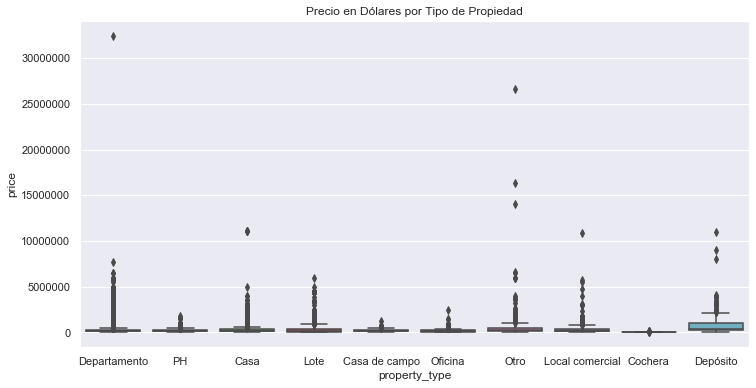

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'price')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

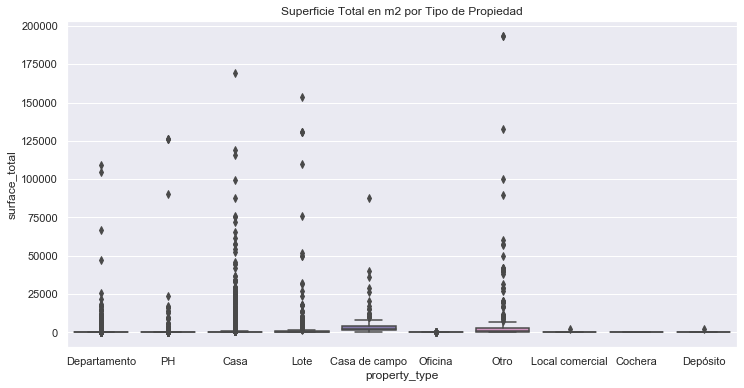

In [15]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

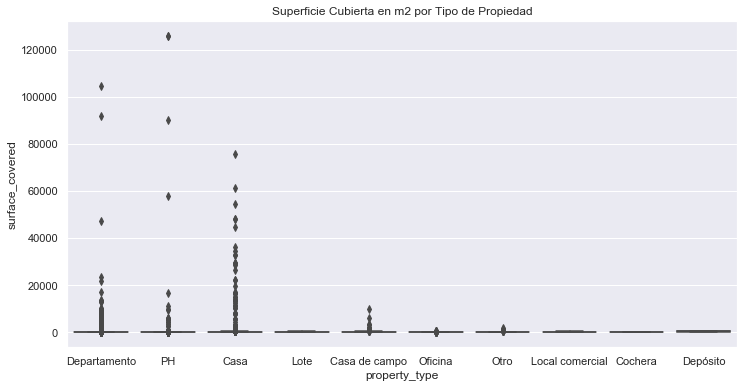

In [16]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *Tanto en `Precio` como en `Superficie Total` se visualizan una gran cantidad de outliers.*
* *En el caso de `Precio`, los outliers más distantes de la mediana (por encima de ella) se observan en `Departamento` y `Otro`.*
* *En el caso de `Superficie Total`, los outliers más distantes de la mediana se observan en `Departamento`, `Lote` y `Otro`.*
* *`Superficie Cubierta` presenta outliers principalmente en `Departamento`, `Casa` y `PH`.*
* *También se observan valores **Nulos**, lo cual no es consistente.*

2. __Eliminación de Outliers:__ se procede a descartar los datos atípicos para cada tipo de propiedad.
* *Primero, se realiza un **primer filtro** en el dataset, aplicando **IQR Score**, para la variable `Precio`.*

In [17]:
Q1_p = properati['price'].quantile(0.25)
Q3_p = properati['price'].quantile(0.75)
IQR_p = Q3_p - Q1_p
print (IQR_p) # Se visualiza el IQR para columna precios

154000.0


In [18]:
mask_price = properati [~ ((properati['price'] <(Q1_p - 1.5 * IQR_p)) | (properati['price']> (Q3_p + 1.5 * IQR_p)))]
properati_2 = mask_price

properati_2['price'].describe().round()

count    135678.0
mean     182308.0
std       98600.0
min        5500.0
25%      109000.0
50%      158000.0
75%      238000.0
max      496000.0
Name: price, dtype: float64

In [19]:
properati_2.shape

(135678, 19)

* *Un **7,5%** de los datos resultaron ser atípicos, de acuerdo a la metodología utilizada (IQR Score).*

* *Luego, se procede a filtrar aquellas instancias en las que la `Superficie Cubierta` sea superior a la `Superficie Total`, ya que en la práctica NO es posible que ésto suceda.*

In [20]:
mask_sup = (properati_2['surface_covered'] <= properati_2['surface_total'])
properati_3 = properati_2[mask_sup]
properati_3[['price','surface_total']].describe().round()

,price,surface_total
count,113736.0,113736.0
mean,185204.0,175.0
std,97906.0,1471.0
min,6000.0,10.0
25%,110000.0,50.0
50%,160000.0,73.0
75%,240000.0,120.0
max,496000.0,169000.0


In [21]:
properati_3.shape

(113736, 19)

* *La muestra se redujo casi un **15%** más.*

* *__Análisis:__ se procede a visualizar la nueva distribución de los datos a partir del primer filtro realizado.*

In [22]:
properati_3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,113736.0,113736.0,112123.0,113736.0,113736.0,113736.0
mean,3.0,2.0,1.0,175.0,93.0,185204.0
std,1.0,1.0,1.0,1471.0,729.0,97906.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,50.0,45.0,110000.0
50%,3.0,2.0,1.0,73.0,64.0,160000.0
75%,4.0,3.0,2.0,120.0,95.0,240000.0
max,35.0,15.0,14.0,169000.0,126062.0,496000.0


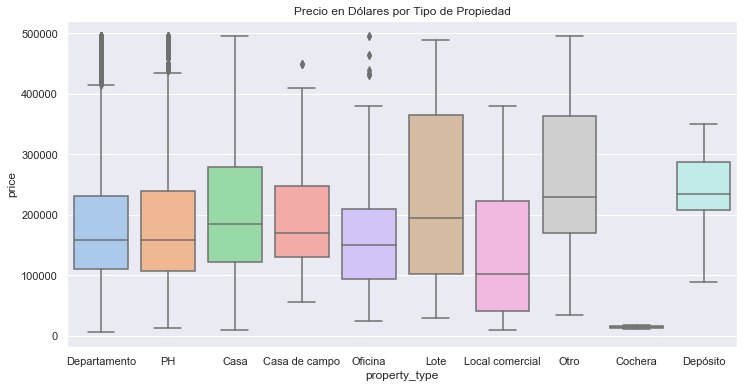

In [23]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'price', palette= 'pastel')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

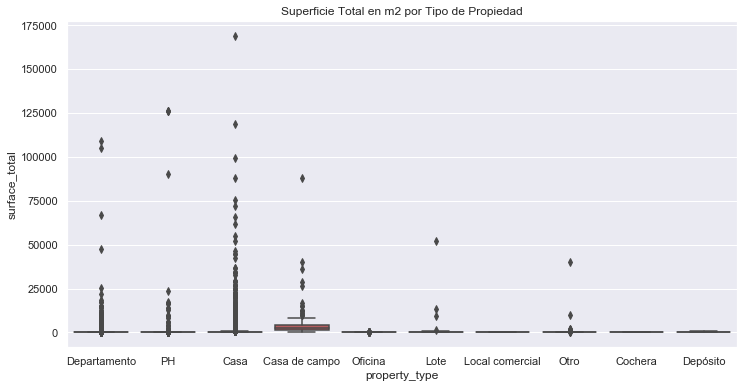

In [24]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

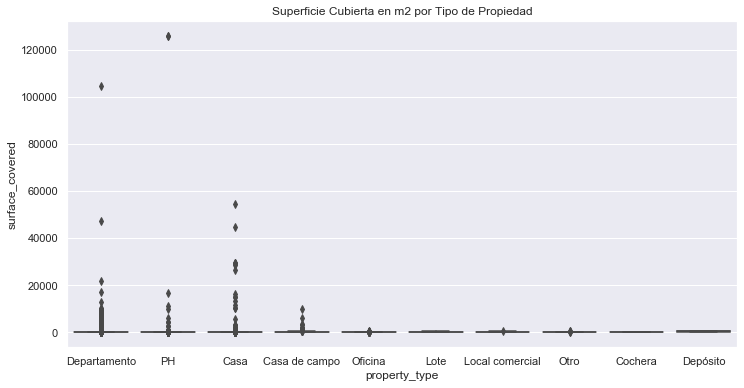

In [25]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *La distribución de datos de `Precio` expone mayor robustez.*
* *Sin embargo, en los casos de `Superficie Total` y `Superficie Cubierta` los valores atípicos siguien distando mucho de la mediana, oscilando entre 10m2 - 169.000m2 y 1m2 - 126.062m2 respectivamente. La Desviación Estándar sigue siendo Elevada.*

* *Se realiza un **segundo filtrado**, con el fin de alcanzar valores razonables en las `Superficies`. Comenzamos con `Superficie Total`.*

In [26]:
Q1_st = properati_3['surface_total'].quantile(0.25)
Q3_st = properati_3['surface_total'].quantile(0.75)
IQR_st = Q3_st - Q1_st
print (IQR_st) # Se visualiza el IQR para columna precios

70.0


In [27]:
mask_st = properati_3 [~ ((properati_3['surface_total'] <(Q1_st - 1.5 * IQR_st)) | (properati_3['surface_total']> (Q3_st + 1.5 * IQR_st)))]
properati_4 = mask_st

properati_4['surface_total'].describe().round()

count    102209.0
mean         80.0
std          42.0
min          10.0
25%          49.0
50%          68.0
75%         100.0
max         225.0
Name: surface_total, dtype: float64

In [28]:
properati_4.shape

(102209, 19)

* *En ésta ocación, la muesta fue acotada un **7,5% más**, en comparación al dataset original.*

* *__Nuevo Análisis:__ a fin de observar la robustez de los datos.*

In [29]:
properati_4[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,102209.0,102209.0,100864.0,102209.0,102209.0,102209.0
mean,3.0,2.0,1.0,80.0,68.0,179640.0
std,1.0,1.0,1.0,42.0,33.0,93863.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,49.0,44.0,110000.0
50%,3.0,2.0,1.0,68.0,60.0,156000.0
75%,3.0,2.0,2.0,100.0,83.0,230000.0
max,35.0,15.0,14.0,225.0,225.0,496000.0


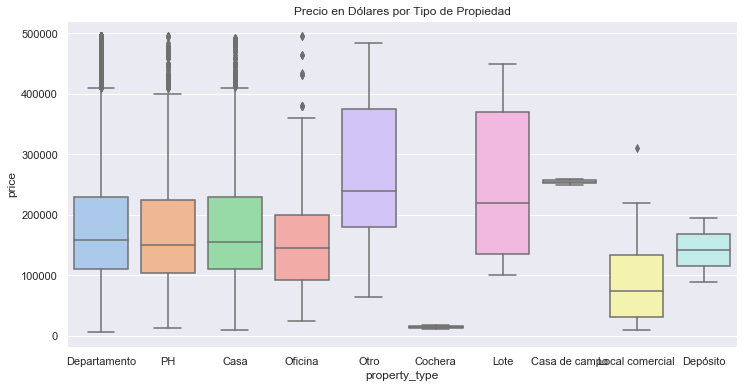

In [30]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'price', palette= 'pastel')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

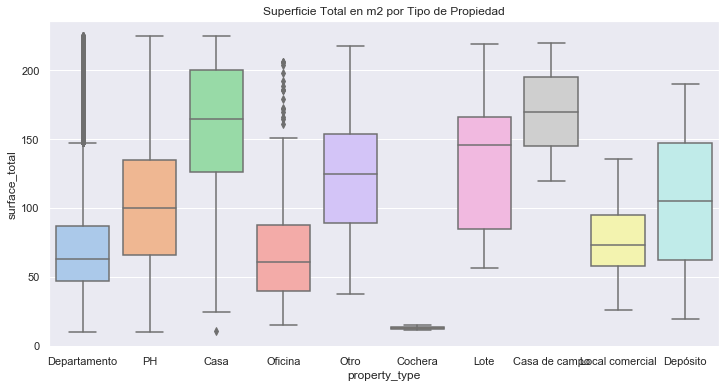

In [31]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'surface_total', palette= 'pastel')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

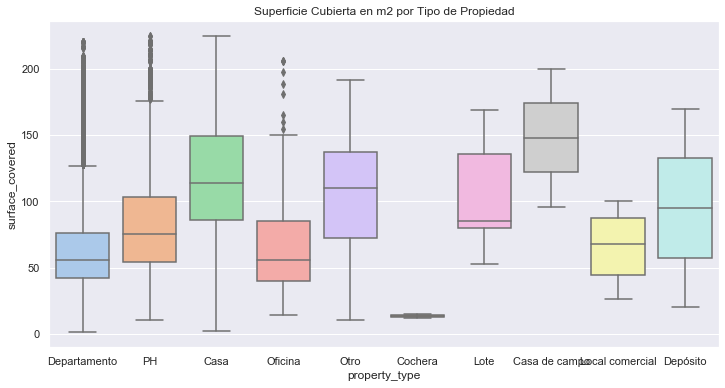

In [32]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'surface_covered', palette= 'pastel')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *Ahora sí. Tanto la distribución de datos de `Precio` como de las `Superficies` exponen mayor robustez.*
* *Si bien aún se verifican algunos Outliers principalmente en precios, por cantidad y valores que alcanzan, sólo lo serían por tipo de propiedad y no considerando el conjunto total de los datos.*

### 2.2 Imputación de Valores Faltantes

In [33]:
properati_4.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                6621
lon                6621
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1345
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

* *Variables que aún cuentan con elementos faltantes:*  
    *1. Latitud y Longitud 6,5% c/u (6.621 c/u);*  
    *2. Baños 1,3% (1.345).*

* *Nos enfocaremos en la imputación de datos de `Baños`, ya que en el próximo paso, trabajaremos con Departamento, Casa y PH (a fin de comparar nuestros resultados con los del Protyecto 1), y no es posible que no hayan Baños en dichos tipos de propiedades (como sí podría ocurrir en un Depósito).*
* *Respecto a latitud y longitud, no se realizará ningún cambio, ya que no serán utilizadas en éste estudio para determinar el precio de las propiedades por la complejidad de su análisis.*

Text(0.5, 1.0, 'Distribución de la variable Baños')

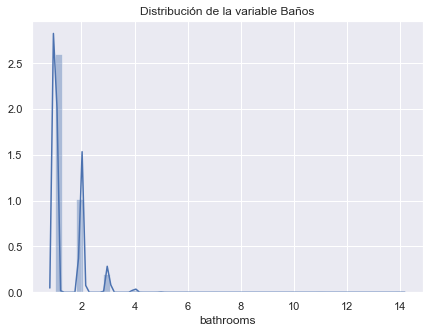

In [34]:
plt.figure(figsize = (7,5))
sns.distplot(properati_4['bathrooms']) 
plt.title('Distribución de la variable Baños')

In [35]:
median_bathrooms = properati_4['bathrooms'].median()
print(median_bathrooms)

1.0


In [36]:
mode_bathrooms = properati_4['bathrooms'].mode()
print(mode_bathrooms)

0    1.0
dtype: float64


In [37]:
mean_bathrooms = properati_4['bathrooms'].mean() # Ya espuesto con anterioridad
print(mean_bathrooms)

1.3936687024111676


* *Si bien alguna de las propiedades posee 14 baños, dicho valor atípico no está influyendo en las medidas de tendencia central, ya que la moda y la mediana son igual a **1.0** y la media igual a **1.39**. A continuación, **se procederá a imputar los datos faltantes con dicho valor de la mediana = moda = 1.0**.*
* *Se agrega que la distribución de sus datos es asímétrica a la derecha (positiva), y la cantidad de valores nulos representa un porcentaje bajo sobre el total. Ésto ocurre por la cantidad de valores nulos observados; sin ellos y sin el inmueble con 14 baños, y dados los valores de la media, mediana y moda (iguales entre sí), sería razonable obserbar una distribución normal de los datos en baños.*

In [38]:
properati_4['bathrooms'] = properati_4['bathrooms'].fillna(median_bathrooms)

<ipython-input-38-aa7d24e5b751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_4['bathrooms'] = properati_4['bathrooms'].fillna(median_bathrooms)


In [39]:
sum(pd.isnull(properati_4['property_type']))

0

* *Todos los valores nulos de `Baños` fueron reemplazados por **1.0**, es decir por el valor de la __media, mediana y moda__.*

### 2.3 Selección de la Muestra

* *A fin de **comparar los resultados** de los modelos del Proyecto 2 **con los resultantes del Proyecto 01**, utilizaremos la misma muestra, es decir, que nos centraremos en:*
    * *Los tipos de propiedad con mayor concentración, `Departamento, Casa y PH` y;*
    * *En la región con mayor número de publicaciones, es decir, `Capital Federal`.*

In [40]:
properati_5 = properati_4 [(properati_4['l2'] == 'Capital Federal') & ((properati_4['property_type'] == 'Departamento') | (properati_4['property_type'] == 'PH') | (properati_4['property_type'] == 'Casa'))]

In [41]:
properati_5.shape

(72037, 19)

* *La muestra se redujo en un **8% más**.*

* *Se exponen nuevamente las Estadísticas Descriptivas, con el Dataset Filtrado.*
* *En su revisión, se verifica que se cumpla que la **Superficie Cubierta Mínima sea de 18m2**, basándose en el Nuevo Código de Edificación de CABA, que entró en vigencia el 1° de enero de 2019, y hablitó la construcción de **microambientes mínimos**, de hasta 18 metros cuadrados. Se puede verificar en [Nuevo Código de Edificación](https://www.buenosaires.gob.ar/desarrollourbano/nuevo-codigo-de-edificacion).*

In [42]:
properati_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72037.00,72037.00,72037.00,72037.00,72037.00,72037.00
mean,2.79,1.84,1.38,75.73,66.50,189653.35
std,1.08,0.91,0.64,38.59,32.15,94027.51
min,1.00,0.00,1.00,12.00,2.00,6000.00
25%,2.00,1.00,1.00,47.00,43.00,119300.00
50%,3.00,2.00,1.00,65.00,58.00,165000.00
75%,3.00,2.00,2.00,93.00,81.00,240000.00
max,21.00,15.00,14.00,225.00,225.00,496000.00


* *Mejora la distribución de los datos, presentando una reducción notable en el desvío estándar de los mismos.*
* *No se verifica el cumplimiento de la `Superficie Cubierta Mínima` de 18m2, por lo que a continuación, lo hacemos cumplir:*

In [43]:
mask_sup2 = (properati_5['surface_covered'] >= 18)
properati_6 = properati_5[mask_sup2]

properati_6['surface_covered'].describe().round()

count    71940.0
mean        67.0
std         32.0
min         18.0
25%         43.0
50%         58.0
75%         81.0
max        225.0
Name: surface_covered, dtype: float64

In [44]:
properati_6.shape

(71940, 19)

* *El **Dataset Final con el que vamos a trabajar**, representa aprox. un **49% del Dataset Original**.*
* *Si bien puede parecer un porcentaje bajo, eran muchos los outliers (como propiedades con Sup. Total de 126.062m2) o mal cargados (como Sup. Total < que Sup. Cubierta).*

* *A continuación se reflejan las **nuevas distribuciones** para las `variables Superficie Total` y `Precio`:*

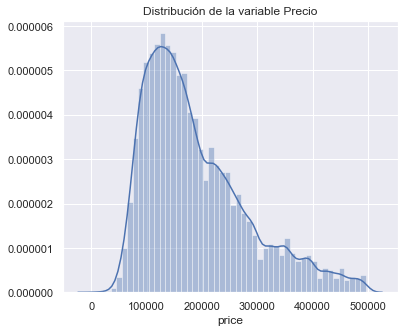

In [45]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['price'])
plt.title('Distribución de la variable Precio')
plt.ticklabel_format(style = 'plain')

Text(0.5, 1.0, 'Precio en Dólares por Tipo de Propiedad')

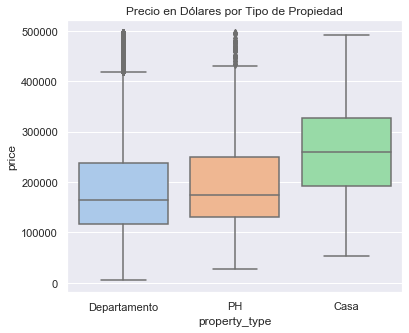

In [46]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'price', palette= 'pastel')
plt.title('Precio en Dólares por Tipo de Propiedad')

Text(0.5, 1.0, 'Distribución de la variable Superficie Total')

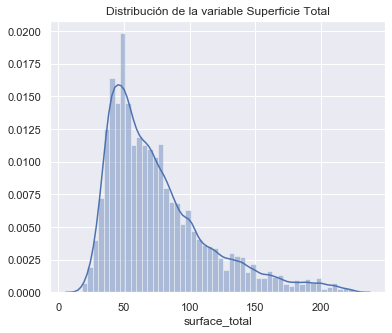

In [47]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['surface_total']) 
plt.title('Distribución de la variable Superficie Total')

Text(0.5, 1.0, 'Superficie Total en m2 por Tipo de Propiedad')

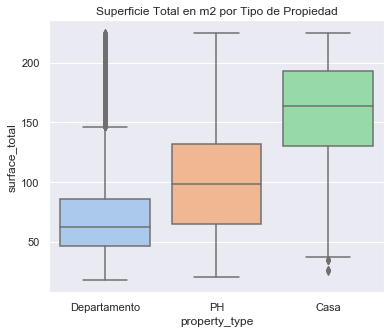

In [48]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'surface_total', palette= 'pastel')
plt.title('Superficie Total en m2 por Tipo de Propiedad')

Text(0.5, 1.0, 'Distribución de la variable Superficie Cubierta')

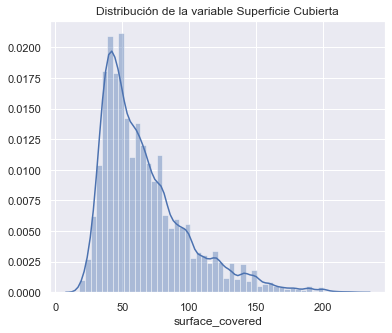

In [49]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['surface_covered']) 
plt.title('Distribución de la variable Superficie Cubierta')

Text(0.5, 1.0, 'Superficie Cubierta en m2 por Tipo de Propiedad')

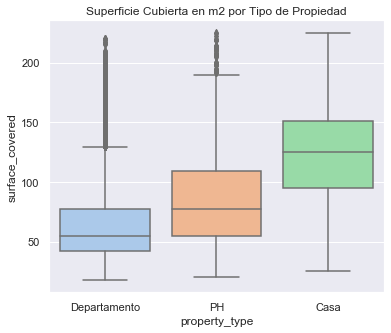

In [50]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'surface_covered', palette= 'pastel')
plt.title('Superficie Cubierta en m2 por Tipo de Propiedad')

* *Tanto en el caso de Superficie como de Precios, se visualizan datos más consistentes.*
* *En ambos casos, es clara la distribución de datos con **asimetría positiva (o a la derecha)**, siendo la mayor parte de los precios de las propiedades, menores a U$S 250.000.*

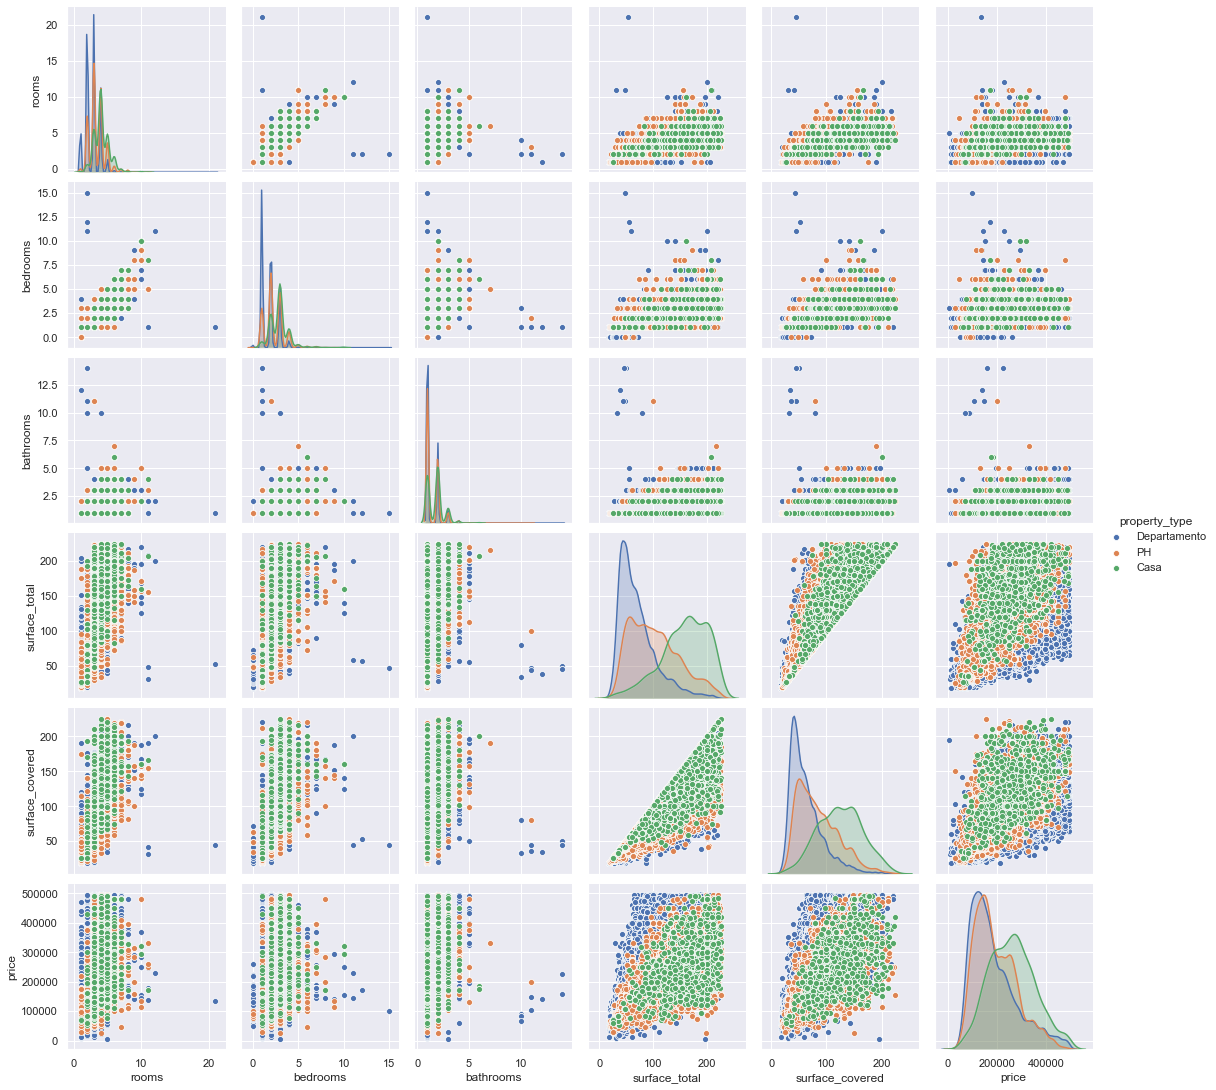

In [51]:
sns.pairplot(data=properati_6, hue= 'property_type', vars=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'])

* *Podemos inferir que tanto Superficie Total como Superficie Cubierta, están altamente correlacionadas con el Precio, no así el resto de las variables.*

### 2.4 Correlaciones 

1. __Correlaciones Pearson:__ Primero se realiza el estudio de las correlaciones entre las variables `rooms, bedrooms, bathrooms, surface_total, surface_covered` y `price`, con el fin de exponer la existencia de correlaciones lineales.

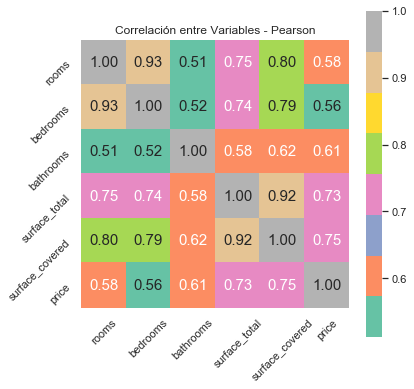

In [52]:
corr = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Set2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables - Pearson')
plt.show()

* *Se observa:*
    * *Correlación Alta **(0.93)**, entre `rooms` (ambientes) y `bedrooms` (dormitorios).*
    * *Correlación Alta **(0.92)**, entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
    * *Además, `surface_covered` y `surface_total`, tiene Correlación Alta y Moderadamente Alta, con todas las demás variables, excepto `bathrooms`.*
* *Por su parte, `Price` posee una correlación Moderadamente Alta con `surface_covered` **(0.75)** y `surface_total` **(0.73)**, coincidiendo con lo esperado, respecto a ser las __variables más relevantes para determinar el precio de los inmuebles__.*

2. __Correlaciones Spearman:__ Para adicionar información al estudio, se expone la correlación a través del método Spearman, con el fin de visualizar la existencia de correlaciones No lineales.

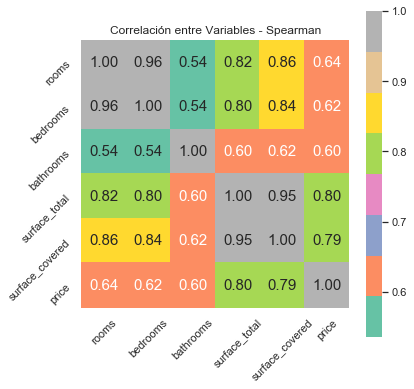

In [53]:
corr = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Set2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables - Spearman')
plt.show()

* *No se observan importantes cambios entre ambos tipos de correlaciones.*
* *Se mantienen las Altas correlaciones entre `rooms` (ambientes) y `bedrooms` (dormitorios), y entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
* `surface_covered` y `surface_total`, incrementan su correlación positiva con`rooms` y `bedrooms`*.
* *Por su parte, `Price` (precio) posee una correlación algo mayor con `surface_covered` **(0.79)** y `surface_total` **(0.80)**.*

### 2.5 Escalado de Datos

* *Primero, se analiza si algunas de las variables requiere escalado.*

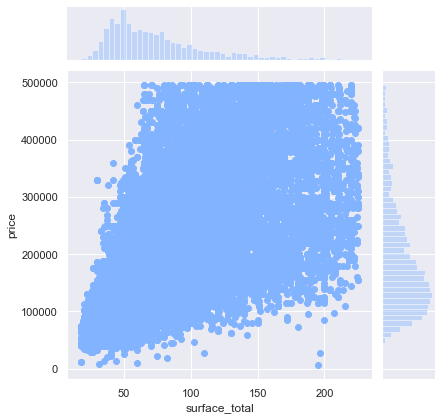

In [54]:
sns.jointplot(x='surface_total', y='price', data=properati_6, color = '#82B3FF')

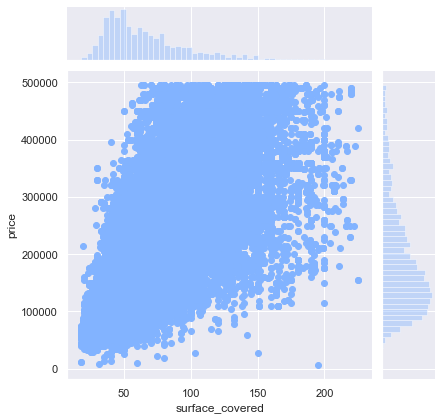

In [55]:
sns.jointplot(x='surface_covered', y='price', data=properati_6, color = '#82B3FF')

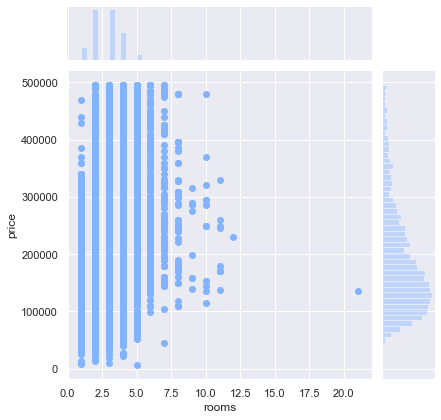

In [56]:
sns.jointplot(x='rooms', y='price', data=properati_6, color = '#82B3FF')

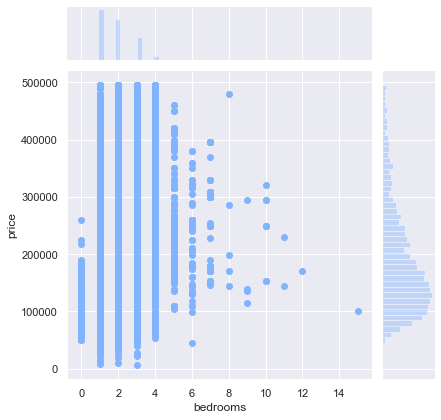

In [57]:
sns.jointplot(x='bedrooms', y='price', data=properati_6, color = '#82B3FF')

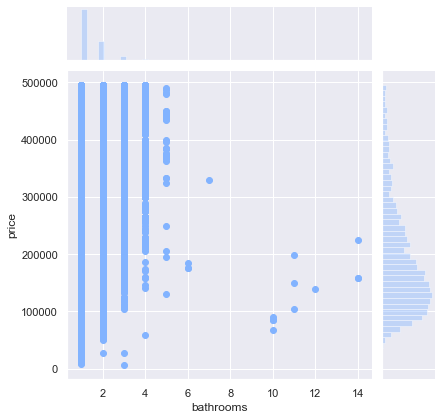

In [58]:
sns.jointplot(x='bathrooms', y='price', data=properati_6, color = '#82B3FF')

* *En `Rooms`, `Bedrooms` y `Bathrooms` parece preciso aplicar escalado a sus datos, por observarse en ellos, valores atípicos muy grandes que pueden degradar el rendimiento predictivo de los algoritmos de aprendizaje automático.*
* *Igualmente, sería preciso realizar el escalado de datos, **para las 5 características** anteriormente expuestas en los gráficos, con el fin de **normalizar sus datos**, dentro de un rango particular.*
* *En el próximo punto, se procederá a realizar dicho proceso a través de **RobustScaler**, ya que, a diferencia de StandardScaler, sus estadísticas de centrado y escalado, se basan en percentiles y, por lo tanto, no están influenciadas por unos pocos valores atípicos marginales muy grandes (como en Baños). En consecuencia, el rango resultante de los valores de las características transformadas es mayor que para StandardScaler y son aproximadamente similares.*

## 3. Modelos de Machine Learning ##

### 1. Regresión Lineal con Atributos Polinómicos (Polynomial Features) y Regularización

#### 1.1 Regresión Lineal con Atributos Polinómicos

* *La regresión polinomial es otra forma de regresión en la que la potencia máxima de la variable independiente es más de 1. En esta técnica de regresión, la línea de mejor ajuste no es una línea recta, sino que tiene la forma de una curva.*

* *__Aclaración:__ Una variable objetivo con una gran variedad de valores, puede resultar en valores de gradiente de error grandes, lo que hace que los valores de peso cambien drásticamente, y que el proceso de aprendizaje sea inestable. La estandarización de las variables independientes produce beneficios vitales cuando un modelo de regresión incluye términos de interacción y términos polinomiales.  
Es por ello, que en el presente apartado, se optó por **incluir el escalado de los datos en la variable X**.*

In [76]:
X_sin_escalar = properati_6[['bedrooms','surface_total','surface_covered']]
y = properati_6[['price']]

In [77]:
X = RobustScaler().fit_transform(X_sin_escalar)

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [80]:
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (17,5))
    
    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Best degree 4 with RMSE 57499.317707654955


Text(0.5, 1.0, 'Degree Vs. RMSE')

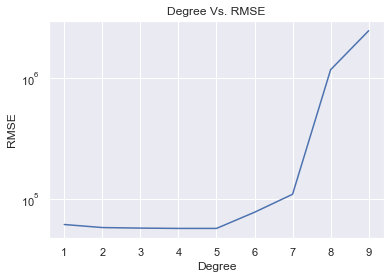

In [81]:
from sklearn.linear_model import LinearRegression

# Visualizamos cuál es el mejor Grado (Degree) a aplicar
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.title('Degree Vs. RMSE')

* *Si bien el gráfico expone un punto mínimo en Grado = 5, parece ser una línea bastante recta desde Grado = 3 hasta dicho punto.*
* *Por ello, y dado que nuestro dataset tiene varios atributos, el modelo se llevará a cabo con un polinomio de grado 3.*

In [82]:
poly = PolynomialFeatures (3, include_bias = False) # Preprocesamiento, de 'Grado 3'
X_train_new = poly.fit_transform(X_train) # Conjunto de datos que incluye los nuevos atributos, las nueva columnas
X_test_new = poly.fit_transform(X_test)

# Ahora son 3 columnas. Son nuevas combinaciones lineales del atributo original
# A la vista, elevó a la 1, a la 2, a la 3

In [83]:
reg = LinearRegression()
reg.fit(X_train_new, y_train)
print(f'Pendientes: {reg.coef_}')
print(f'Ordenada: {reg.intercept_}')

Pendientes: [[ -19551.06661428  103528.361963     36893.10550728   -3768.62666908
     1738.39112561    1216.47213727 -113762.22519706  186225.35462648
   -86436.36150412     396.33139555   -3113.08939151    1977.43977243
      386.743114      6926.34011474   -5030.39415473   31777.64261122
   -77055.45561358   51476.62882944  -10374.62157675]]
Ordenada: [175098.18267303]


In [84]:
y_train_pred_reg = reg.predict(X_train_new)
y_test_pred_reg = reg.predict(X_test_new)

Raíz del error cuadrático medio en Train: 57870.905941066594
Raíz del error cuadrático medio en Test: 57847.32910177554


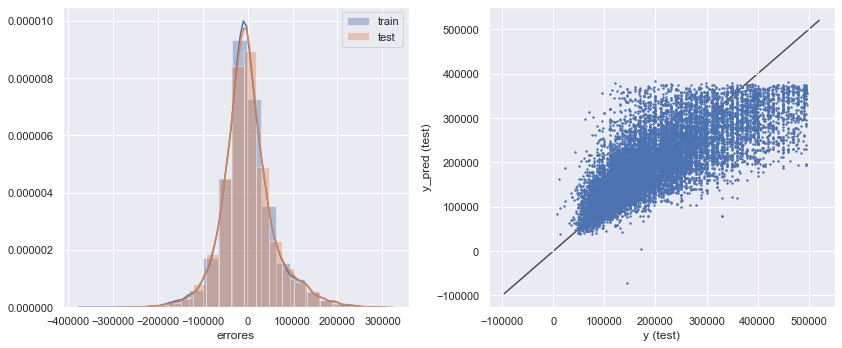

In [85]:
evaluar_regresion(reg, X,y, X_train_new, X_test_new, y_train, y_test)

#### 1.2 Regularización

* *En la regularización, lo que hacemos es mantener el mismo número de características, pero reducir la magnitud de los coeficientes.*

* *__Regulación L2 o RIDGE:__ Se agrega a la función de Costo, un término proporcional al cuadrado del valor de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero (pero no llegan al cero absoluto).*
    * *El valor de Alpha, puede ser de 0.1 hasta el valor que se desee.*
    * *Cuanto mayor sea el valor de alpha, menos varianza exhibirá su modelo y menor será la dispersión de los datos.*
    * *Funciona bien si hay muchos parámetros grandes de aproximadamente el mismo valor.*   

* *__Regulación L1 o LASSO:__ Se agrega a la función de Costo, un término proporcional al valor absoluto de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero o convierte a algunos coeficientes en Cero. Así, elimina las características menos importantes en nuestro modelo.*
    * *El valor de Alpha, puede variar de 0.1 a 1.*
    * *Tiende a funcionar bien si hay una pequeña cantidad de parámetros significativos y los otros están cerca de cero.* 

##### 1.2.1 Se entrena el modelo **Ridge**

In [86]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge() # No se incluye alpha, ya que en la consigna se indica entrenar y evaluar con los argumentos por defecto
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [[-1.95399301e+04  1.02603682e+05  3.76623997e+04 -3.78008645e+03
   2.25177899e+03  8.04737456e+02 -1.11459404e+05  1.81158368e+05
  -8.38151553e+04  3.97589784e+02 -3.09323629e+03  1.95939939e+03
   1.78560050e+02  7.10548168e+03 -5.03632044e+03  3.09988069e+04
  -7.49513980e+04  5.00194542e+04 -1.01718499e+04]]
Ordenada: [175025.48556441]


Raíz del error cuadrático medio en Train: 57871.20021232086
Raíz del error cuadrático medio en Test: 57849.427429279865


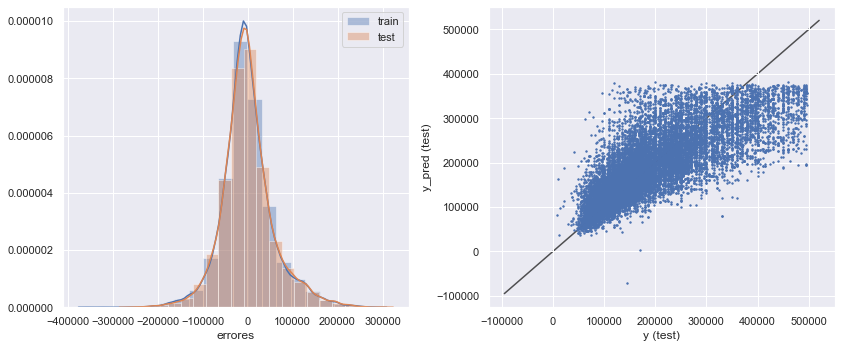

In [87]:
evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

##### 1.2.2 Se entrena el modelo **Lasso**

In [88]:
reg_lasso = Lasso()
reg_lasso.fit(X_train_new,y_train)

print(reg_lasso.coef_, reg_lasso.intercept_)

[-19792.4933022   80843.39330843  56689.3293529   -4431.39354501
  10384.79328126  -3921.14563073 -55249.00609084  64911.97649342
 -27642.334855      464.90585506  -2043.57380849   1031.72136522
  -3389.8302545    8898.89782399  -4462.53511574  10650.29840235
 -19965.42349928   8529.06378105  -1640.57264219] [173273.19549528]


C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83826171958855.98, tolerance: 44460424695.692566
  model = cd_fast.enet_coordinate_descent(


Raíz del error cuadrático medio en Train: 58059.35558056731
Raíz del error cuadrático medio en Test: 58084.74148950626


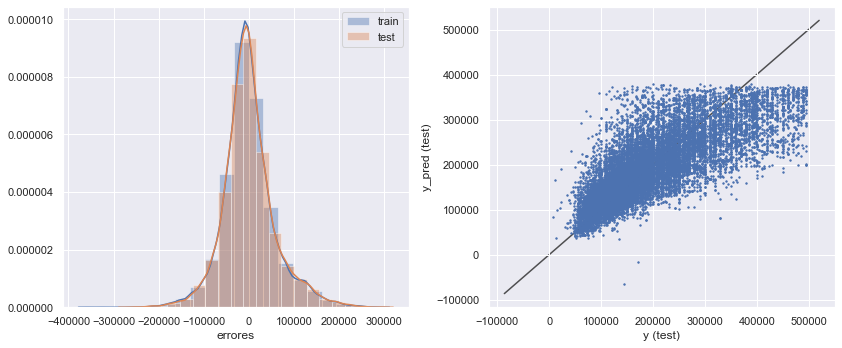

In [89]:
def evaluar_regresion_2(model,X,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train).reshape(50358,1)
    y_test_pred = model.predict(X_test).reshape(21582,1)
    
    # Calculamos el Error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### Graficamos los Resultados
    plt.figure(figsize = (17,5))
    
    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()
    
evaluar_regresion_2(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

* *La regularización __`Ridge` resultó ser más efectiva__ que Lasso, y ésto es porque la mayoría de los predictores elegidos influyen en la respuesta (superficie total y cubierta influyen sobre la determinación de los precios).*
* *Sin embargo, el modelo con regularización __`Ridge`__, se observa una distribución levemente más simétrica en comparación con Lasso.* 
* *Respecto al gráfico **y**  vs  **y predicho** para el conjunto de test, los puntos se van alejando de la diagonal, y el error, parece ser cada vez mayor de forma similar tanto en Ridge como Lasso.*

#### 1.3 Optimización de Hiperparámetros: RandomSerch

* *Dado que en el presente modelo se van agregando atributos, se procede a optimizar hiperparámetros a través de RandomSearch, a fin de acelerar el proceso.*

##### 1.3.1 Se determina el mejor `alpha` para el modelo Ridge, por ser el que mejor resultado arrojó

In [90]:
#import scipy as sp

from sklearn.model_selection import RandomizedSearchCV # Búsqueda aleatoria en hiperparámetros.

In [91]:
ridge = Ridge()

In [92]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_ramdom = dict(alpha=alpha)
ramdom = RandomizedSearchCV(estimator=ridge, param_distributions=param_ramdom, verbose=1, n_jobs=-1, n_iter = 100)
ramdom_result = ramdom.fit(X_train_new, y_train)
print('Best Score: ', ramdom_result.best_score_)
print('Best Params: ', ramdom_result.best_params_)

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6081111435463654
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.0s finished


##### 1.3.2 Se entrena el modelo Ridge con el `Best Params` según RandomSearch

In [93]:
reg_ridge_random = Ridge(alpha= 0.1)
reg_ridge_random.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [[-1.95399301e+04  1.02603682e+05  3.76623997e+04 -3.78008645e+03
   2.25177899e+03  8.04737456e+02 -1.11459404e+05  1.81158368e+05
  -8.38151553e+04  3.97589784e+02 -3.09323629e+03  1.95939939e+03
   1.78560050e+02  7.10548168e+03 -5.03632044e+03  3.09988069e+04
  -7.49513980e+04  5.00194542e+04 -1.01718499e+04]]
Ordenada: [175025.48556441]


In [94]:
y_train_pred_random = reg_ridge_random.predict(X_train_new)
y_test_pred_random = reg_ridge_random.predict(X_test_new)

In [95]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_random))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_random))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 57870.90903033886
Raíz del error cuadrático medio en Test: 57847.51733972841


* *Se comprueba que los RMSE obtenidos son menores, luego de la regularización Rodge, realizada con el mejor parámetro de alpha detectado.*

### 2. XG-Boost

* *__Aclaración:__ Los clasificadores basados en Árboles de decisión y los métodos de conjuntos basados en Árboles (RF, XGB) son invariantes al escalado de características (no lo requieren para converger a los errores mínimos), pero aún así, podría ser una buena idea reescalar / estandarizar su datos.  
Es por ello, que en el presente apartado, se optó por llevar a cabo el modelo de XG-Boost, **sin previo escalado de los datos**.*

In [96]:
X = properati_6[['bedrooms','surface_total','surface_covered']]
y = properati_6[['price']]

In [97]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

#### 2.1 Se entrena y evalúa el modelo, con sus argumentos por defecto

In [98]:
# Separamos los datos en train y test (held-out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [99]:
xgb = xgb.XGBRegressor() # Default n_estimators=100, max_depth=6

In [100]:
xgb.fit(X_train, y_train, eval_metric=['error'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [102]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 49224.7832269769
Raíz del error cuadrático medio en Test: 52531.26665072429


In [103]:
print(xgb.feature_importances_)

[0.06915884 0.6492927  0.28154844]


* *`Surface Total` es el atributo mas importante, el que mejor separa los datos.*

#### 2.2 Optimización de Hiperparámetros: GridSerch

* *Con el fin de encontrar una solución óptima, y por utilizar sólo 3 atributos en X, se utiliza GridSearch para encontrar el mejor hiperparámetro.*

In [104]:
model = XGBRegressor()
n_estimators = [50,100,150,200,250,300]
max_depth = [2,4,6,8]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   58.0s finished


In [105]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.6803130629917252
Best Params:  {'max_depth': 8, 'n_estimators': 100}


#### 2.3 Se entrena el modelo XGB con los argumentos obtenidos de Gridsearch

In [106]:
import xgboost as xgb
from xgboost import XGBRegressor

In [107]:
xgb_grid = xgb.XGBRegressor(n_estimators=100, max_depth=8, random_state=10)

In [108]:
xgb_grid.fit(X_train, y_train, eval_metric=['error'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=10, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Modelo: XG-Boost
Raíz del error cuadrático medio en Train: 45207.52609621751
Raíz del error cuadrático medio en Test: 51105.46982281323


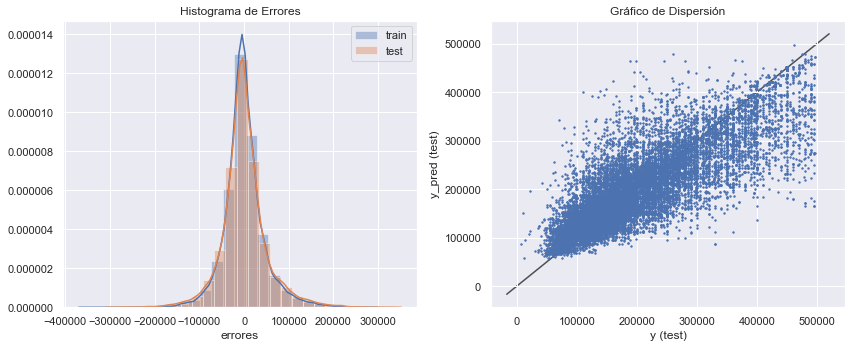

In [109]:
modelo = ['XG-Boost']

for i, model in enumerate([xgb_grid]):
    y_train_pred = model.predict(X_train).reshape(50358,1)
    y_test_pred = model.predict(X_test).reshape(21582,1)
    
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

In [110]:
print(xgb_grid.feature_importances_)

[0.07411551 0.5133352  0.4125492 ]


* *Si bien `Surface Total` sigue siendo el atributo que mejor separa los datos, `Surface Covered` ha adquirido una mayor importancia.*
* *Habiendo definido los mejores Hiperparámetros, el Error de Train mejoró notablemente (se redujo en 4.017), y algo menos el Error de Test (se redujo en 1.426), por lo que podemos detectar una tendencia al Sobreajuste.*

### 3. Comparación del desempeño de los modelos

* *En éste caso, fue **XG-Boost fue el modelo con mejor desempeño**.*
* *Éste resultado, era realmente el esperado, ya que se trata de un algoritmo eficiente y fácil de usar que ofrece un alto rendimiento y precisión en comparación con otros algoritmos.*
* *XGBoost, por otro lado, hace divisiones hasta el max_depth especificado y luego comienza a podar el árbol hacia atrás y elimina las divisiones más allá de las cuales no hay ganancia positiva.*
* *Es por ello que se considera uno de los modelos más eficientes a la hora de realizar predicciones.*
* *Sin embargo, si bien XGBoost tiene una regularización incorporada L1 (Regresión de Lasso) y L2 (Regresión de Ridge) que evita que el modelo se sobreajuste, en nuestro caso se ve algo Sobreajustado, ya que el RMSE Train resulta notablemente inferior que el RMSE de Test.*

* *En el caso de **Polynomial Features**, lo que se hizo fue crear muchos atributos nuevos con combinaciones distintas, esperando aproximarse con esas combinaciones, a la función objetivo.*
* *El modelo se desarrolló con PolynomialFeatures de Grado 3, ya que si bien mayores grados podría haber dado lugar a un mejor desempeño, no era muy recomendable teniendo el cuenta el número de features en nuestro dataset, y además porque su desempeño no parecía variar entre dicho Grado y el indicado como Óptimo (Grado = 5).*
* *No se observó sobreajuste en el modelo, ya que se llevó adelante la regularización a través de L2 Ridge, sin embargo no se obtuvieron tan buenos resultados como en el caso de Arboles de Decisión previo PCA*.

## 4. Clustering

* *Se procederá a realizar la comparación de K-Means, Silhouette y DBSCAN, con el fin de observar los resultados arrojados por cada uno de ellos, respecto a cómo se encuentran concentrados los Barrios.*

### 1. K-Means

In [111]:
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

* *Se utiliza el dataset **properati_6**, ya que incluye el feature `l3`, que es sobre el cual se trabajará para determinar los Clusters existentes.*

1.1 Se aplica **Dummies** sobre la variable `Barrios`.

In [112]:
dummies = pd.get_dummies(properati_6['l3'])
dummies.head()

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* *Dado que ha sido creado un marco de datos completamente nuevo, y para compararlo con el marco de datos original, es necesario fusionarlos o concatenarlos para que funcionen correctamente. Al crear variables ficticias, se crean nuevas columnas para el conjunto de datos original.*

* *Se coloca la variable ficticia en el lado derecho del marco de datos.*

In [113]:
barrios = pd.concat([properati_6,dummies], axis = 1)
barrios.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.44,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X = barrios[['l3']]
y = barrios[['price']]

In [115]:
print (X)

                   l3
0       San Cristobal
1               Boedo
2             Palermo
3             Palermo
5        Villa Crespo
...               ...
146548        Palermo
146549        Palermo
146550        Palermo
146555        Palermo
146557        Palermo

[71940 rows x 1 columns]


1.2 Se determina el **número de Clusters y Centros**.

In [116]:
n_samples = 71940
n_centros = 8
X, y = make_blobs(centers=n_centros, cluster_std=0.3, n_features=2, random_state=0)

* *Se grafican los datasets.*

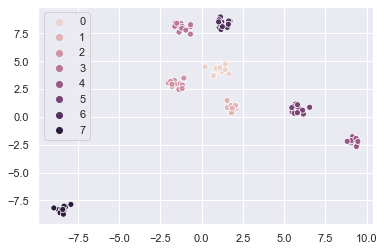

In [117]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, legend ='full')
plt.show()

* *Se evaluarán las particiones a realizar mediante KMeans usando la distancia al centroide. La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar.*
* *Se grafica dicha curva, para elegir el número de particiones óptimos con el metodo del codo.*
* *Se realiza una lista con las distancias medias a los centroides en el dataset 1, probando con un número de clústers que va de 2 a 14.*

In [118]:
lista_distancias_medias = []

K = np.arange(2,14)
for k in K:
   
    km = KMeans(n_clusters=k)
    km = km.fit(X)
   
    distancia_total = km.inertia_
    # Inercia: la suma de la distancia al cuadrado de cada punto con su respectivo centroide
    
    distancia_media = distancia_total / n_samples
    lista_distancias_medias.append(distancia_media)
    # Distorsión: el promedio de todas las distancias de los centroides con sus respectivos puntos al cuadrado.

* *Se grafica la distancia media en función del número de clústers.*

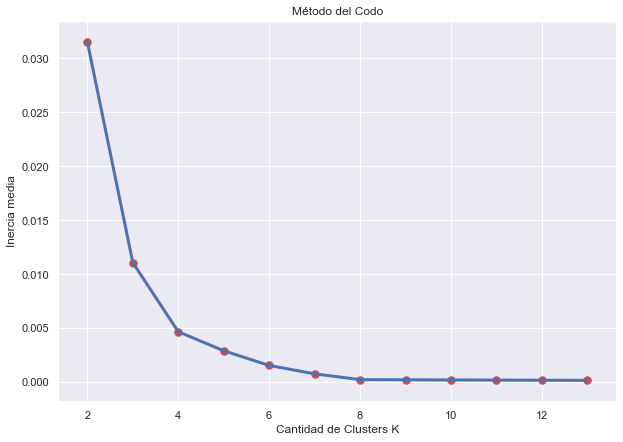

In [119]:
plt.figure(figsize = (10,7))
# Graficamos una linea continua y tambien unos puntos para resaltar los valores enteros de K.
plt.plot(K, lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias, s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del Codo')

plt.show()

* *Se busca el mejor numero de k en cada caso según la curva y se grafican los clusters para cada dataset.*
* *El número óptimo se encuentra cuando la curva detiene la caída abrupta y empieza a disminuir lentamente.*

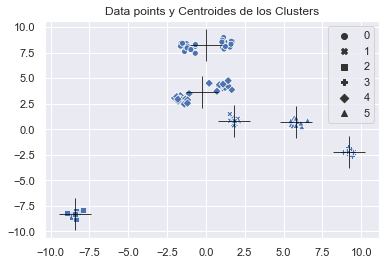

In [120]:
# Defino y entreno el modelo
km = KMeans(n_clusters=6)
km = km.fit(X)

# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_

# Graficamos los centros de los clusters y los datapoints
sns.scatterplot(X[:, 0], X[:, -1], style = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points y Centroides de los Clusters')
plt.show()

* *S/ el gráfico, parecería que el **n_clusters** más acorde sería de **6**.*

### 2. Silhouette

* *A continuación, se evalúan las particiones mediante el valor de silhouette.*
* *Al variar los parámetros de los modelos de clustering, cambiará la distribución del valor de Silhouettes en los datos. Con esa distribución, se elegirán los mejores parametros posibles (cohesión y separación).*

*__Nota 1:__ el coeficiente de Silhoutte va de -1 a 1.*

*__Nota 2:__ el Silhouette promedio también va del -1 al 1, donde en 1 los clusters están bien separados, en 0 están cerca y en -1 el los clusters están mezclados. Esto nos da una idea de cuán buena es la separación en clusters.*

* *En ésta oportunidad, vamos a calcular el valor de silhouette usando la función `silhouette_score`.*

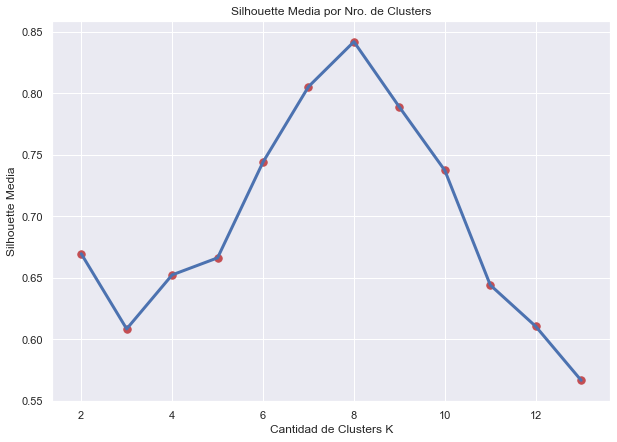

In [121]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette Media')
plt.title('Silhouette Media por Nro. de Clusters')
plt.show()

* *El gráfico, representa el Promedio de todas las siluetas por cantidad de clusters.*
* *Si contrastamos con la próxima gráfica de silueta, que se verá de costado, vendría a ser la línea punteada observada.*

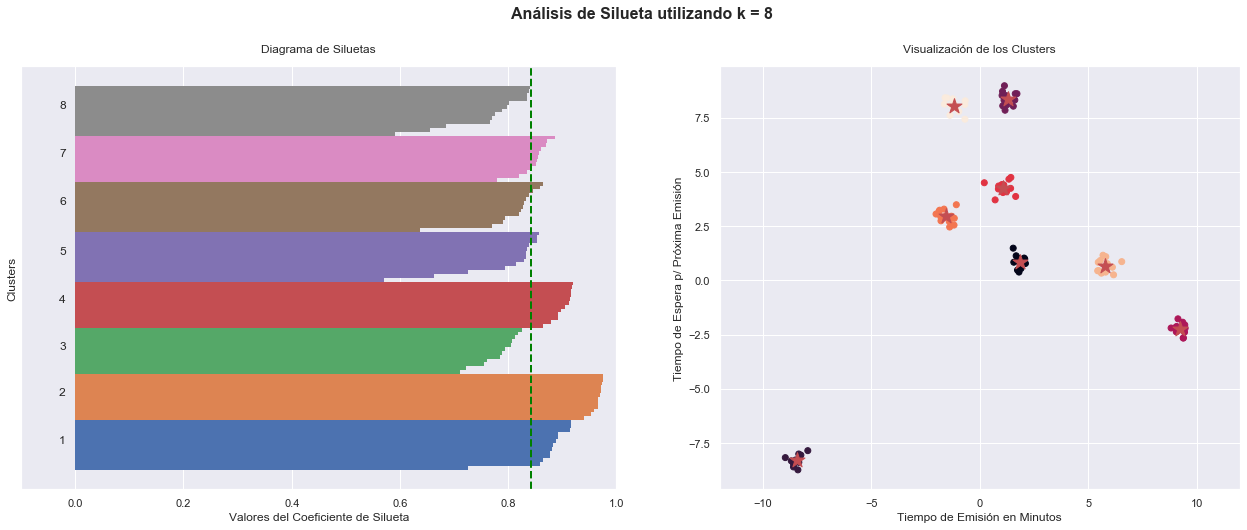

In [122]:
X_std = X

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
    
km = KMeans(n_clusters=8)
labels = km.fit_predict(X_std)
centroids = km.cluster_centers_

silhouette_vals = silhouette_samples(X_std, labels)

y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Valores del Coeficiente de Silueta')
ax1.set_ylabel('Clusters')
ax1.set_title('Diagrama de Siluetas', y=1.02);

# Scatter plot of data colored with labels
ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
ax2.set_xlim([-12, 12])
ax2.set_xlim([-12, 12])
ax2.set_xlabel('Tiempo de Emisión en Minutos')
ax2.set_ylabel('Tiempo de Espera p/ Próxima Emisión')
ax2.set_title('Visualización de los Clusters', y=1.02)
ax2.set_aspect('equal')
plt.tight_layout()
plt.suptitle(f'Análisis de Silueta utilizando k = {8}', fontsize=16, fontweight='semibold', y=1.05);

* *Aclaraciones del gráfico:*
    * *En el eje x está el valor de Silhouette, en el eje y los clusters.*
    * *El valor de silhouette de cada instancia está graficado como una barrita muy finita. Están todas las instancias graficadas, ordenadas de mayor a menor.*
    * *La línea punteada roja representa el Silhouette promedio de toda la partición.*
* *En éste caso, los clusters se ven bien separados, y de hecho ese es el típico gráfico buscado. Todos los coeficientes están cerca del Silhouette promedio, algunos por arriba, otros por abajo, pero no hay grandes discrepancias.*

* *Como se observa, el mejor número de Clusters para separar los `Barrios` es **k=8**, lo cual difiere de lo arrojado por K-Means (k=6)*

### 3. DBSCAN

1. Se importan los módulos de Python necesarios.

In [123]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

2. Se eliminan las coordenadas nulas.

In [124]:
barrios.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 3274
lon                 3274
                    ... 
Villa Riachuelo        0
Villa Santa Rita       0
Villa Soldati          0
Villa Urquiza          0
Villa del Parque       0
Length: 76, dtype: int64

In [125]:
df = barrios.dropna() # Se eliminan todos los núlos porque sólo se trata de lat y lon (variables que vamos a utilizar)
df.shape

(68666, 76)

3. Se convierten las columnas de coordenadas de latitud y longitud en una matriz numérica bidimensional.

In [126]:
coords = df[['lat', 'lon']].to_numpy()

4. Se **calcula DBSCAN**.

* *Se utiliza la métrica de Haversine y el algoritmo de Ball Tree, para calcular distancias de grandes círculos entre puntos.*
* *El parámetro **épsilon** es la distancia máxima (0,5 km en este ejemplo, por tratarse de barrios, y esperarse que las propiedades se encuentren, en general, cercanas unas de las otras) que los puntos pueden estar entre sí para ser considerados un grupo.*
* *El parámetro **min_samples** es el tamaño mínimo del clúster (todo lo demás se clasifica como ruido). Al ser min_samples=1, cada punto de datos será asignado a un grupo.*
* *A diferencia de k-means, DBSCAN no requiere que especifique el número de clústeres por adelantado; los determina automáticamente en función de los parámetros épsilon y min_samples.*

In [127]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian

# Run the DBSCAN from sklearn
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', \
            metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

clusters = \
    pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])
print('Number of clusters: {}'.format(n_clusters))

Number of clusters: 8


* *El número de Clusters para los `Barrios`, resultó ser igual al arrojado s/ Silhouette --> **k=8**.*
* *Si bien podemos estimar a través de éstos métodos, en cuántos clusters deben separarse idealmente los barrios, no tenemos información respecto a qué Barrios pertenece a cada grupo.*

## 5. Conclusión
Más alla de las estimaciones realizadas respecto a la conformación de los Clusters, es necesario ser crítico al respecto, ya que si bien la combinación de Precio y Ubicación pueden ser importantes a la hora de encuadrar cada uno de ellos, también serán determinantes otras variables, como ser, Seguridad, Servicios, Transporte Público, Comercios Cercanos, entre otros, no analizadas en el presente estudio, por no contar con suficiente información al respecto.*